# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Muhammad Rozy Syahputra
- Email: rozyrangkuti27@gmail.com
- Id Dicoding: muhammadrozy

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import joblib


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

### Menyiapkan data yang akan diguankan

## Data Understanding

load data from drive

In [3]:
df = pd.read_csv('/content/drive/MyDrive/dataset/students_performance/data.csv', delimiter=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


check dataset info

In [4]:
print("Data Info:")
df.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 n

Check data shape

In [5]:
print("Data Shape:", df.shape)

Data Shape: (4424, 37)


check for missing values

In [6]:
print("Missing Values:")
df.isnull().sum()

Missing Values:


,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


As the dataset contains no missing values, we can move on to the next step.

Descriptive summary of a dataset including both numerical and categorical (object) data.

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Marital_status,4424.0,NaN,NaN,NaN,1.178571,0.605747,1.0,1.0,1.0,1.0,6.0
Application_mode,4424.0,NaN,NaN,NaN,18.669078,17.484682,1.0,1.0,17.0,39.0,57.0
Application_order,4424.0,NaN,NaN,NaN,1.727848,1.313793,0.0,1.0,1.0,2.0,9.0
Course,4424.0,NaN,NaN,NaN,8856.642631,2063.566416,33.0,9085.0,9238.0,9556.0,9991.0
Daytime_evening_attendance,4424.0,NaN,NaN,NaN,0.890823,0.311897,0.0,1.0,1.0,1.0,1.0
Previous_qualification,4424.0,NaN,NaN,NaN,4.577758,10.216592,1.0,1.0,1.0,1.0,43.0
Previous_qualification_grade,4424.0,NaN,NaN,NaN,132.613314,13.188332,95.0,125.0,133.1,140.0,190.0
Nacionality,4424.0,NaN,NaN,NaN,1.873192,6.914514,1.0,1.0,1.0,1.0,109.0
Mothers_qualification,4424.0,NaN,NaN,NaN,19.561935,15.603186,1.0,2.0,19.0,37.0,44.0
Fathers_qualification,4424.0,NaN,NaN,NaN,22.275316,15.343108,1.0,3.0,19.0,37.0,44.0


Identify the unique values in each categorical feature.

In [8]:
for feature in df.select_dtypes(include='object'):
    print(feature)
    print(df[feature].unique(), '\n')

Status
['Dropout' 'Graduate' 'Enrolled'] 



Check for data duplicates

In [9]:
df.duplicated().sum()

np.int64(0)

As the dataset contains no duplicate entries, we can move on to the next step.

How the data looks, using sample function

In [10]:
df.sample(10)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
2605,2,44,1,9085,1,39,160.0,1,37,37,...,0,5,8,5,12.000000,1,9.4,-0.8,-3.12,Graduate
1769,1,51,1,9147,1,1,116.0,1,3,3,...,3,8,10,3,10.333333,0,8.9,1.4,3.51,Enrolled
3055,5,7,1,9130,1,3,160.0,1,19,38,...,0,5,7,2,13.000000,2,10.8,1.4,1.74,Dropout
2191,1,1,6,9500,1,1,138.0,1,4,19,...,0,8,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3427,1,1,1,9238,1,1,136.0,1,19,1,...,0,6,10,6,11.333333,0,7.6,2.6,0.32,Graduate
2960,1,1,1,9670,1,1,133.1,1,1,1,...,0,6,10,6,12.666667,0,10.8,1.4,1.74,Graduate
1329,1,1,1,9085,1,1,120.0,1,4,1,...,0,6,17,3,13.750000,0,11.1,0.6,2.02,Enrolled
1366,1,51,1,9119,1,1,136.0,1,1,19,...,2,7,9,6,13.875000,0,11.1,0.6,2.02,Dropout
3083,1,1,1,9130,1,1,110.0,1,3,19,...,0,6,0,0,0.000000,0,11.1,0.6,2.02,Dropout
1394,1,17,5,9773,1,1,113.0,1,38,38,...,0,6,6,6,12.500000,0,8.9,1.4,3.51,Graduate


Check for unique data

In [11]:
print(df.nunique())

Marital_status                                    6
Application_mode                                 18
Application_order                                 8
Course                                           17
Daytime_evening_attendance                        2
Previous_qualification                           17
Previous_qualification_grade                    101
Nacionality                                      21
Mothers_qualification                            29
Fathers_qualification                            34
Mothers_occupation                               32
Fathers_occupation                               46
Admission_grade                                 620
Displaced                                         2
Educational_special_needs                         2
Debtor                                            2
Tuition_fees_up_to_date                           2
Gender                                            2
Scholarship_holder                                2
Age_at_enrol

check the value count of the status column from the dataset

In [12]:
df['Status'].value_counts()

,count
Status,
Graduate,2209
Dropout,1421
Enrolled,794


Label Decoder

Replace encoded feature values with their respective categorical labels in the DataFrame for visualization needs

In [13]:
def label_decoder(df, feature):
    """
    Replace encoded feature values with their respective categorical labels in the DataFrame

    Parameters
        df (pandas.DataFrame) : The DataFrame containing the feature to be transformed
        feature (str or list of str) : The name of the feature to be transformed

    Returns
        pandas.DataFrame : The DataFrame with the specified feature as categorical labels
    """

    category_mappings = {
        'Marital_status': {1: 'Single', 2: 'Married', 3: 'Widower', 4: 'Divorced', 5: 'Facto Union', 6: 'Legally Seperated'},
        'Daytime_evening_attendance': {0: 'Evening', 1: 'Daytime'},
        'Gender': {0: 'Female', 1: 'Male'},
        'Application_mode' : {
            1: '1st Phase - General Contingent',
            2: 'Ordinance No. 612/93',
            5: '1st Phase - Special Contingent (Azores Island)',
            7: 'Holders of Other Higher Courses',
            10: 'Ordinance No. 854-B/99',
            15: 'International Student (Bachelor)',
            16: '1st Phase - Special Contingent (Madeira Island)',
            17: '2nd Phase - General Contingent',
            18: '3rd Phase - General Contingent',
            26: 'Ordinance No. 533-A/99, Item B2 (Different Plan)',
            27: 'Ordinance No. 533-A/99, Item B3 (Other Institution)',
            39: 'Over 23 Years Old',
            42: 'Transfer',
            43: 'Change of Course',
            44: 'Technological Specialization Diploma Holders',
            51: 'Change of Institution/Course',
            53: 'Short Cycle Diploma Holders',
            57: 'Change of Institution/Course (International)'
        },
        'Course': {
            33: 'Biofuel Production Technologies',
            171: 'Animation and Multimedia Design',
            8014: 'Social Service (Evening Attendance)',
            9003: 'Agronomy',
            9070: 'Communication Design',
            9085: 'Veterinary Nursing',
            9119: 'Informatics Engineering',
            9130: 'Equinculture',
            9147: 'Management',
            9238: 'Social Service',
            9254: 'Tourism',
            9500: 'Nursing',
            9556: 'Oral Hygiene',
            9670: 'Advertising and Marketing Management',
            9773: 'Journalism and Communication',
            9853: 'Basic Education',
            9991: 'Management (Evening Attendance)'
        },
        'Nacionality': {
            1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian',
            13: 'Dutch', 14: 'English', 17: 'Lithuanian', 21: 'Angolan',
            22: 'Cape Verdean', 24: 'Guinean', 25: 'Mozambican',
            26: 'Santomean', 32: 'Turkish', 41: 'Brazilian', 62: 'Romanian',
            100: 'Moldova (Republic of)', 101: 'Mexican', 103: 'Ukrainian',
            105: 'Russian', 108: 'Cuban', 109: 'Colombian'
        },
        'Qualification': {
            1: 'Secondary Education - 12th Year of Schooling or Eq.',
            2: "Higher Education - Bachelor's Degree",
            3: 'Higher Education - Degree',
            4: "Higher Education - Master's",
            5: 'Higher Education - Doctorate',
            6: 'Frequency of Higher Education',
            9: '12th Year of Schooling - Not Completed',
            10: '11th Year of Schooling - Not Completed',
            11: '7th Year (Old)',
            12: 'Other - 11th Year of Schooling',
            13: '2nd Year Complementary High School Course',
            14: '10th Year of Schooling',
            15: '10th Year of Schooling - Not Completed',
            18: 'General Commerce Course',
            19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
            20: 'Complementary High School Course',
            22: 'Technical - Professional Course',
            25: 'Complementary High School Course - Not Concluded',
            26: '7th Year of Schooling',
            27: '2nd Cycle of the General High School Course',
            29: '9th Year of Schooling - Not Completed',
            30: '8th Year of Schooling',
            31: 'General Course of Administration and Commerce',
            33: 'Supplementary Accounting and Administration',
            34: 'Unknown',
            35: "Can't Read or Write",
            36: 'Can Read Without Having a 4th Year of Schooling',
            37: 'Basic Education 1st Cycle (4th/5th Year) or Equiv.',
            38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
            39: 'Technological Specialization Course',
            40: 'Higher Education - Degree (1st Cycle)',
            41: 'Specialized Higher Studies Course',
            42: 'Professional Higher Technical Course',
            43: 'Higher Education - Master (2nd Cycle)',
            44: 'Higher Education - Doctorate (3rd Cycle)'
        },
        'Occupation': {
            0: 'Student',
            1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
            2: 'Specialists in Intellectual and Scientific Activities',
            3: 'Intermediate Level Technicians and Professions',
            4: 'Administrative Staff',
            5: 'Personal Services, Security and Safety Workers and Sellers',
            6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
            7: 'Skilled Workers in Industry, Construction and Craftsmen',
            8: 'Installation and Machine Operators and Assembly Workers',
            9: 'Unskilled Workers',
            10: 'Armed Forces Professions',
            90: 'Other Situation',
            99: '(Blank)',
            101: 'Armed Forces Officers',
            102: 'Armed Forces Sergeants',
            103: 'Other Armed Forces Personnel',
            112: 'Directors of Administrative and Commercial Services',
            114: 'Hotel, Catering, Trade and Other Services Directors',
            121: 'Specialists in the Physical Sciences, Mathematics, Engineering and Related Techniques',
            122: 'Health Professionals',
            123: 'Teachers',
            124: 'Specialists in Finance, Accounting, Administrative Organization, Public and Commercial Relations',
            125: 'Specialists in Information and Communication Technologies (ICT)',
            131: 'Intermediate Level Science and Engineering Technicians and Professions',
            132: 'Technicians and Professionals, of Intermediate Level of Health',
            134: 'Intermediate Level Technicians From Legal, Social, Sports, Cultural and Similar Services',
            135: 'Information and Communication Technology Technicians',
            141: 'Office Workers, Secretaries in General and Data Processing Operators',
            143: 'Data, Accounting, Statistical, Financial Services and Registry-Related Operators',
            144: 'Other Administrative Support Staff',
            151: 'Personal Service Workers',
            152: 'Sellers',
            153: 'Personal Care Workers and the Like',
            154: 'Protection and Security Services Personnel',
            161: 'Market-Oriented Farmers and Skilled Agricultural and Animal Production Workers',
            163: 'Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, Subsistence',
            171: 'Skilled Construction Workers and the Like, Except Electricians',
            172: 'Skilled Workers in Metallurgy, Metalworking and Similar',
            173: 'Skilled Workers in Printing, Precision Instrument Manufacturing, Jewelers, Artisans and the Like',
            174: 'Skilled Workers in Electricity and Electronics',
            175: 'Workers in Food Processing, Woodworking, Clothing and Other Industries and Crafts',
            181: 'Fixed Plant and Machine Operators',
            182: 'Assembly Workers',
            183: 'Vehicle Drivers and Mobile Equipment Operators',
            191: 'Cleaning Workers',
            192: 'Unskilled Workers in Agriculture, Animal Production, Fisheries and Forestry',
            193: 'Unskilled Workers in Extractive Industry, Construction, Manufacturing and Transport',
            194: 'Meal Preparation Assistants',
            195: 'Street Vendors (Except Food) and Street Service Providers'
        }
    }

    category_mappings['Previous_qualification'] = category_mappings['Qualification']
    category_mappings['Mothers_qualification'] = category_mappings['Qualification']
    category_mappings['Fathers_qualification'] = category_mappings['Qualification']
    category_mappings['Mothers_occupation'] = category_mappings['Occupation']
    category_mappings['Fathers_occupation'] = category_mappings['Occupation']

    binary_features = ['Displaced', 'Educational_special_needs', 'Debtor',
                       'Tuition_fees_up_to_date', 'Scholarship_holder',
                       'International']
    binary_mapping = {0: 'No', 1: 'Yes'}

    features = [feature] if isinstance(feature, str) else feature

    for f in features:
        if f in category_mappings:
            df[f] = df[f].map(category_mappings[f])
        elif f in binary_features:
            df[f] = df[f].map(binary_mapping)

    return df


before we convert it to a categorical label, we can use the copied dataframe so as not to disturb the original dataframe

In [14]:
cat_df = df.copy()

cat_df = label_decoder(cat_df, ['Marital_status', 'Application_mode', 'Course',
                                 'Daytime_evening_attendance',
                                 'Previous_qualification', 'Nacionality',
                                 'Mothers_qualification', 'Fathers_qualification',
                                 'Mothers_occupation', 'Fathers_occupation',
                                 'Displaced', 'Educational_special_needs' ,
                                 'Debtor', 'Tuition_fees_up_to_date', 'Gender',
                                 'Scholarship_holder', 'International'])

cat_df.head(10)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,Single,2nd Phase - General Contingent,5,Animation and Multimedia Design,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,Single,International Student (Bachelor),1,Tourism,Daytime,Secondary Education - 12th Year of Schooling o...,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,Single,1st Phase - General Contingent,5,Communication Design,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,Single,2nd Phase - General Contingent,2,Journalism and Communication,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 Years Old,1,Social Service (Evening Attendance),Evening,Secondary Education - 12th Year of Schooling o...,100.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,Married,Over 23 Years Old,1,Management (Evening Attendance),Evening,Basic Education 3rd Cycle (9th/10th/11th Year)...,133.1,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,Single,1st Phase - General Contingent,1,Nursing,Daytime,Secondary Education - 12th Year of Schooling o...,142.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,Single,3rd Phase - General Contingent,4,Tourism,Daytime,Secondary Education - 12th Year of Schooling o...,119.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,Single,1st Phase - General Contingent,3,Social Service,Daytime,Secondary Education - 12th Year of Schooling o...,137.0,Romanian,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,Single,1st Phase - General Contingent,1,Social Service,Daytime,Secondary Education - 12th Year of Schooling o...,138.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Basic Education 3rd Cycle (9th/10th/11th Year)...,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


iterates through every column in the cat_df DataFrame that is of the 'object' data type

In [15]:
for feature in cat_df.select_dtypes(include='object'):
    print(feature)
    print(cat_df[feature].unique(), '\n')

Marital_status
['Single' 'Married' 'Divorced' 'Widower' 'Facto Union' 'Legally Seperated'] 

Application_mode
['2nd Phase - General Contingent' 'International Student (Bachelor)'
 '1st Phase - General Contingent' 'Over 23 Years Old'
 '3rd Phase - General Contingent' 'Short Cycle Diploma Holders'
 'Technological Specialization Diploma Holders'
 'Change of Institution/Course' 'Change of Course'
 'Holders of Other Higher Courses' 'Transfer'
 '1st Phase - Special Contingent (Madeira Island)'
 '1st Phase - Special Contingent (Azores Island)' 'Ordinance No. 612/93'
 'Ordinance No. 854-B/99' 'Change of Institution/Course (International)'
 'Ordinance No. 533-A/99, Item B2 (Different Plan)'
 'Ordinance No. 533-A/99, Item B3 (Other Institution)'] 

Course
['Animation and Multimedia Design' 'Tourism' 'Communication Design'
 'Journalism and Communication' 'Social Service (Evening Attendance)'
 'Management (Evening Attendance)' 'Nursing' 'Social Service'
 'Advertising and Marketing Management' 'Bas

Label Encoding

Apply label encoding to the Status feature.

In [16]:
# le = LabelEncoder()
# df['Status'] = le.fit_transform(df['Status'])

# dict(zip(le.classes_, le.transform(le.classes_)))

In [17]:
encoder = LabelEncoder()
df['Status'] = encoder.fit_transform(df['Status'])
joblib.dump(encoder, "encoder_target.joblib")

dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

{'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}

Export the cleaned dataset

In [18]:
# Dataset designed for business dashboard visualization
cat_df.to_csv('cleaned_student_data.csv', index=False)

### Exploratory Data Analysis (EDA)

Distribution of Status (Target Variable)

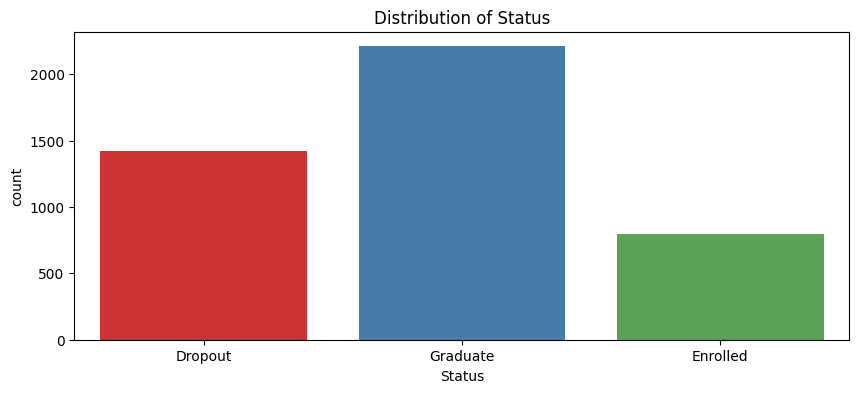

In [19]:
plt.figure(figsize=(10, 4))
sns.countplot(x=cat_df['Status'], data=cat_df, hue=cat_df['Status'], palette='Set1')
plt.title(f'Distribution of Status')
plt.show()

Heatmap Correlation Matrix of Student Performance Data

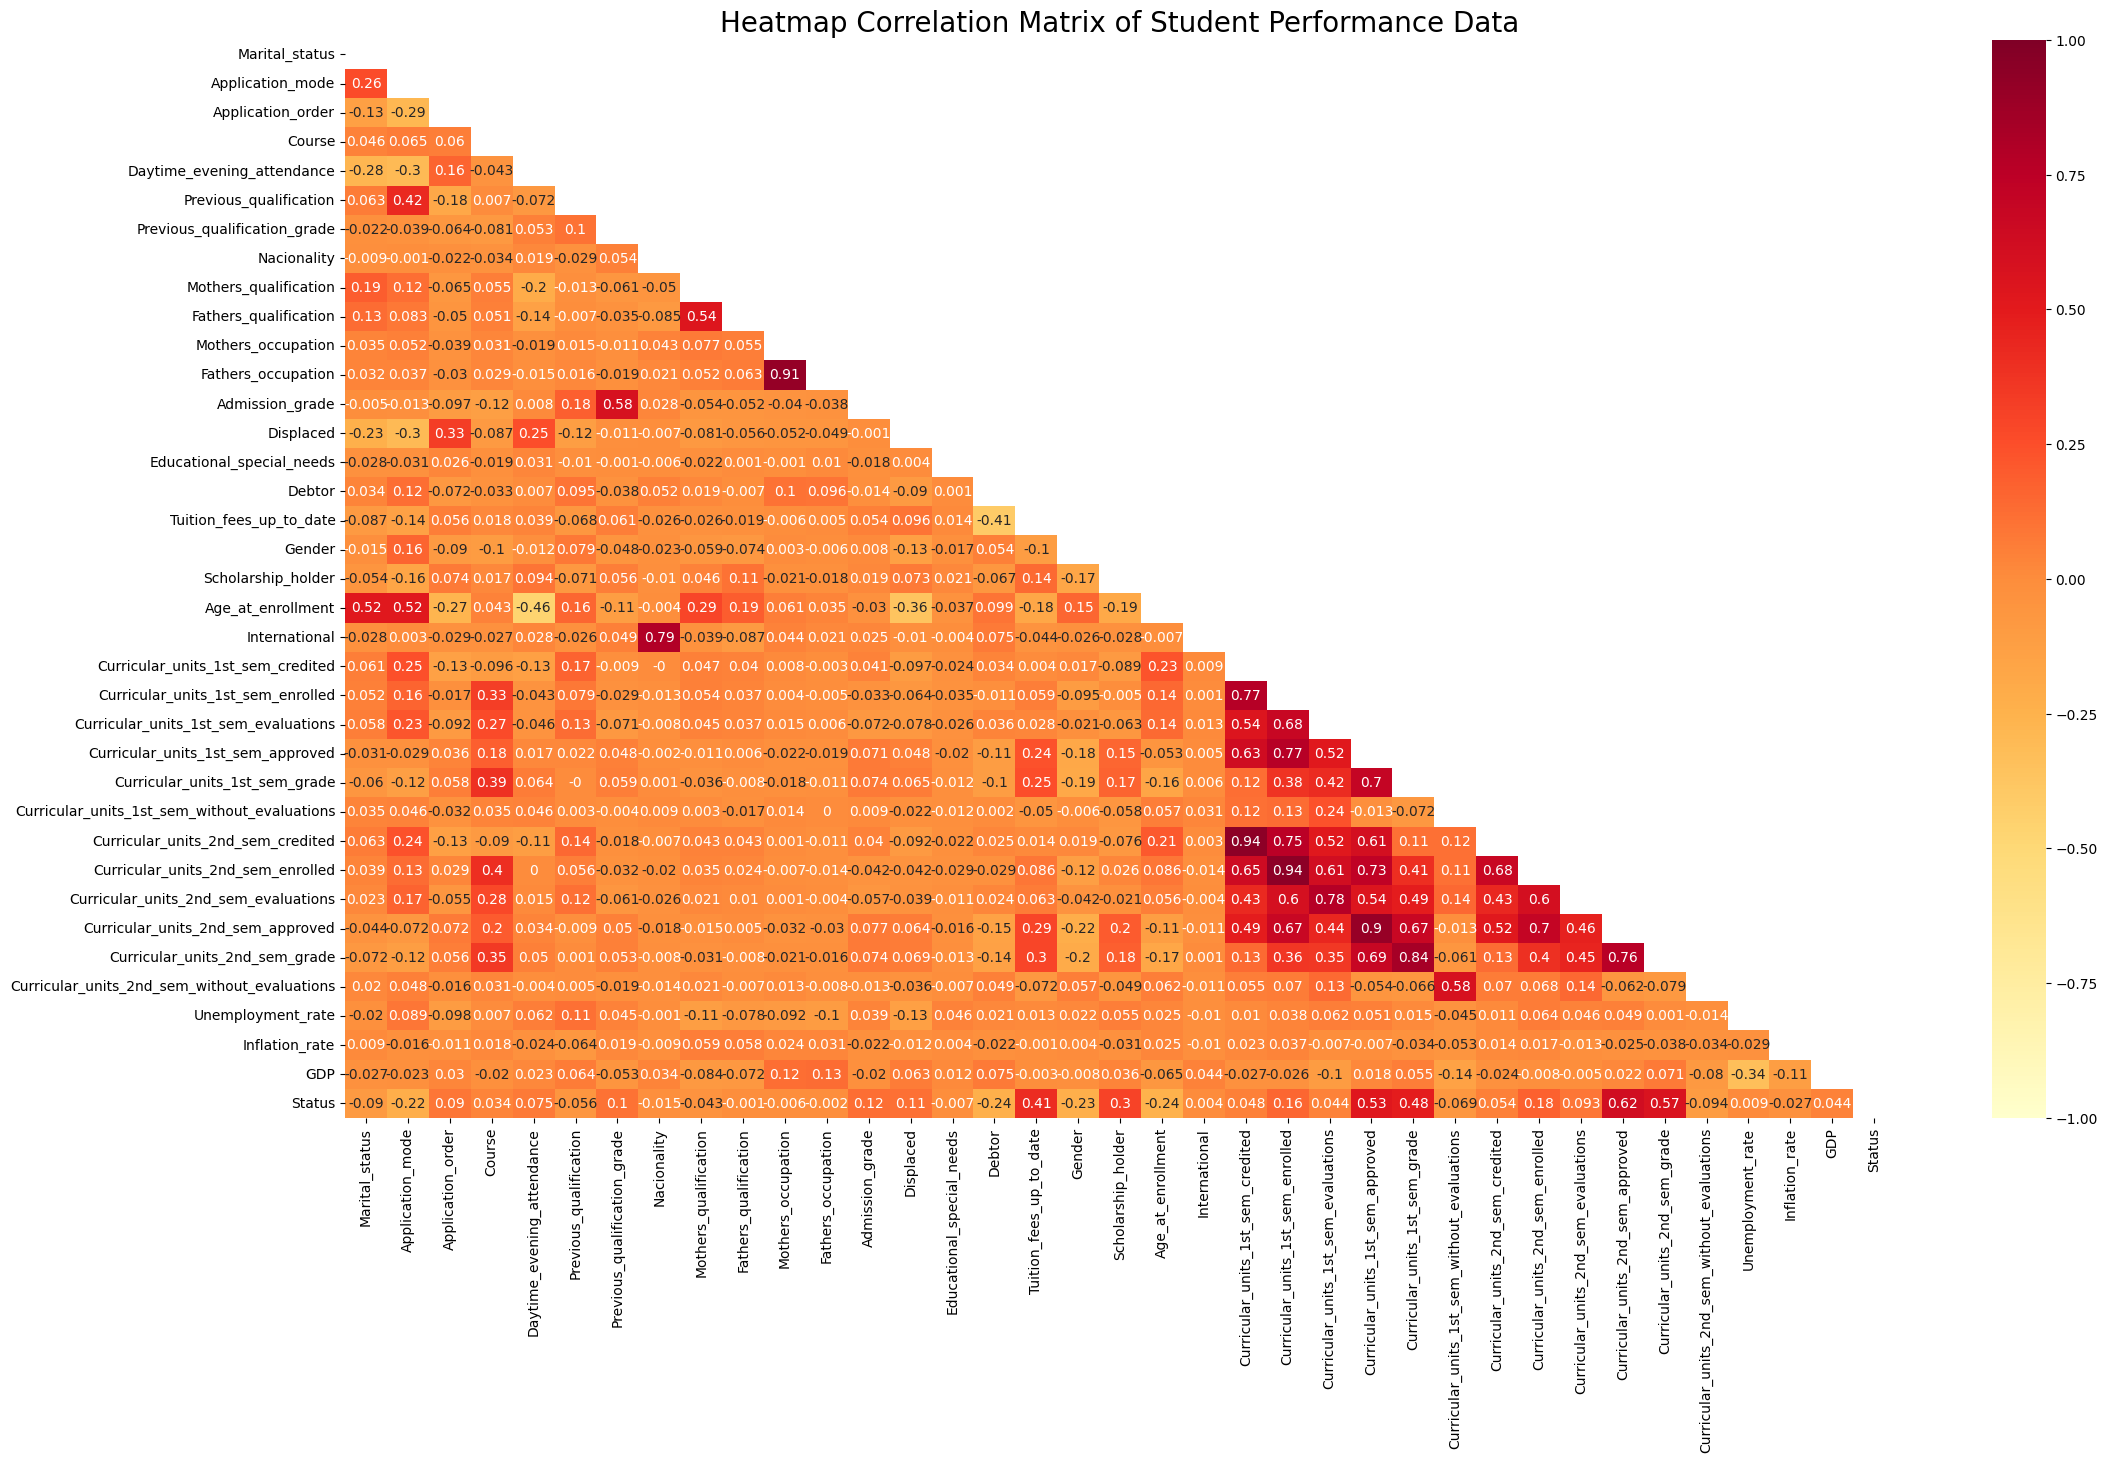

In [20]:
plt.figure(figsize=(25, 14))
correlation_matrix = df.corr(numeric_only=True).round(3)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1,annot=True, cmap='YlOrRd', mask=mask)
plt.title('Heatmap Correlation Matrix of Student Performance Data', size=20)
plt.show()

Based on the correlation matrix plot above, here are some key points related to the Status feature:

1.   **Curricular_units_2nd_sem_approved** and
     **Curricular_units_2nd_sem_grade** show a relatively strong correlation with **Status**, indicating a significant influence.
2.   **Curricular_units_1st_sem_approved**,
     **Curricular_units_1st_sem_grade**, **Tuition_fees_up_to_date**, and **Scholarship_holder** exhibit a moderate relationship with **Status**.
3.   Features such as **Age_at_enrollment**, **Debtor**,
     **Gender**, and **Application_mode** have only a weak correlation with **Status**.
4.   All other features demonstrate a very minimal or negligible
     influence on the **Status** variable.

Define Pie Plot

In [21]:
def pie_plot(data, title):
    """
    Create a pie chart for the distribution of a categorical column.

    Parameters:
    - data: DataFrame, the dataset to plot.
    - title: str, the title of the plot.

    Returns:
    This function does not return any value but displays a pie chart.
    """
    data = data.value_counts()
    plt.pie(data, labels=data.index,
            autopct=lambda pct: f'{int(pct/100.*data.sum())} ({pct:.2f}%)')
    plt.title(f'Distribution of {title}')
    plt.show()

Define Count Plot

In [22]:
def count_plot(data, y, hue=None, title='Data', figsize=(8, 4)):
    """
    Create a countplot with annotations for a given dataset.

    Parameters:
    - data: DataFrame, the dataset to plot.
    - y: str, the column to plot on the y-axis.
    - hue: str, optional, the column for hue categorization.
    - title: str, the title of the plot.
    - figsize: tuple, the size of the figure.

    Returns:
    - This function does not return any value but displays a countplot.
    """
    plt.figure(figsize=figsize)
    ax = sns.countplot(data=data, y=y, hue=hue,
                    order=data[y].value_counts().index)
    plt.title(f'Distribution of {title}')
    plt.grid()

    if hue:
        plt.legend(loc='lower right')

    # Add annotation label to each bar
    for bar in ax.patches:
        if bar.get_width() > 0 and bar.get_height() > 0:
            ax.annotate(
                f'{int(bar.get_width())}',
                (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                ha='left', va='center', textcoords='offset points', xytext=(5, 0))

Pie plot implementation with student performance data

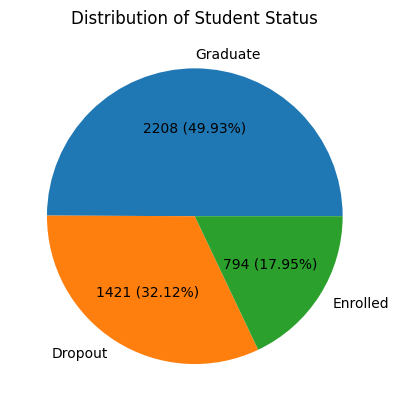

In [23]:
pie_plot(cat_df['Status'], 'Student Status')

Students with Graduate status make up the largest proportion at 49.93%, followed by Dropout students at 32.12%, and Enrolled students represent the smallest group at just 17.95%.

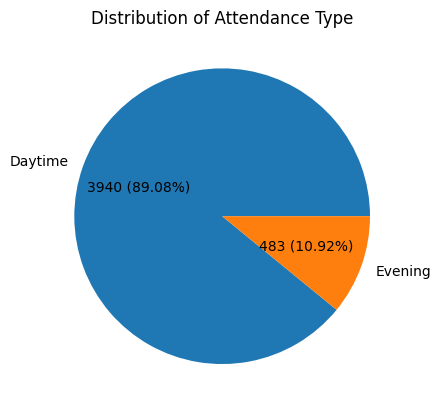

In [24]:
pie_plot(cat_df['Daytime_evening_attendance'], 'Attendance Type')

With 89.08% of students, daytime attendance represents the highest percentage, significantly more than the 10.92% of students with evening attendance.

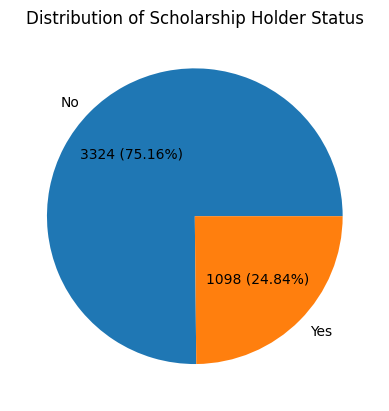

In [25]:
pie_plot(cat_df['Scholarship_holder'], 'Scholarship Holder Status')

Scholarship holders accounted for just 24.84% (nearly a quarter) of students, compared to 75.16% without scholarships.

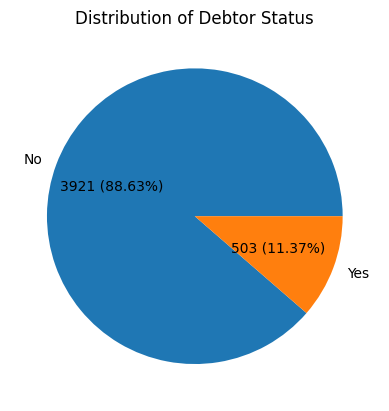

In [26]:
pie_plot(cat_df['Debtor'], 'Debtor Status')

A small minority of students (11.37%) have debt, while the overwhelming majority (88.63%) do not.

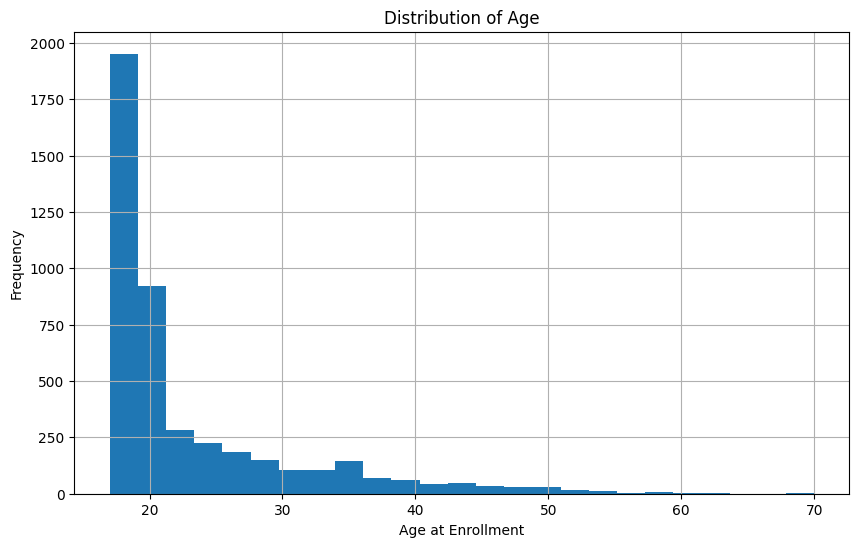

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(cat_df['Age_at_enrollment'], bins=25)
plt.title('Distribution of Age')
plt.xlabel('Age at Enrollment')
plt.ylabel('Frequency')
plt.grid()
plt.show()

Most students who register are between 18 and 21 years old.

<ipython-input-22-c8dd31ab59f3>:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right')


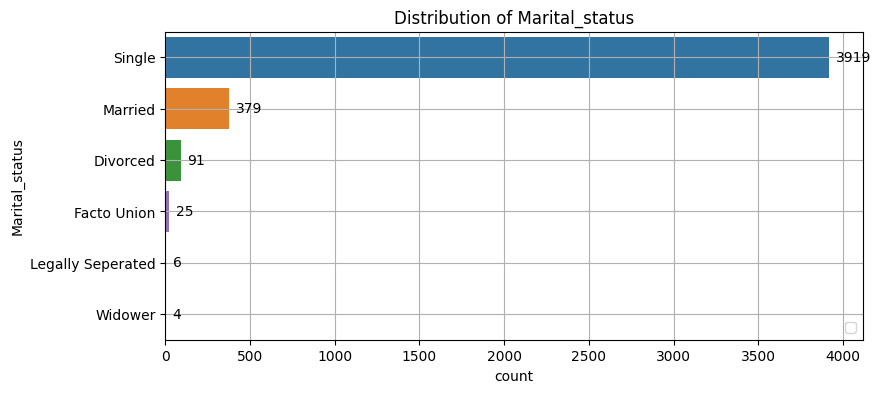

In [28]:
count_plot(cat_df, 'Marital_status', 'Marital_status', 'Marital_status', (9, 4))

The majority of students are single with 3919, followed by Married with 379, divorced with 91 and so on.

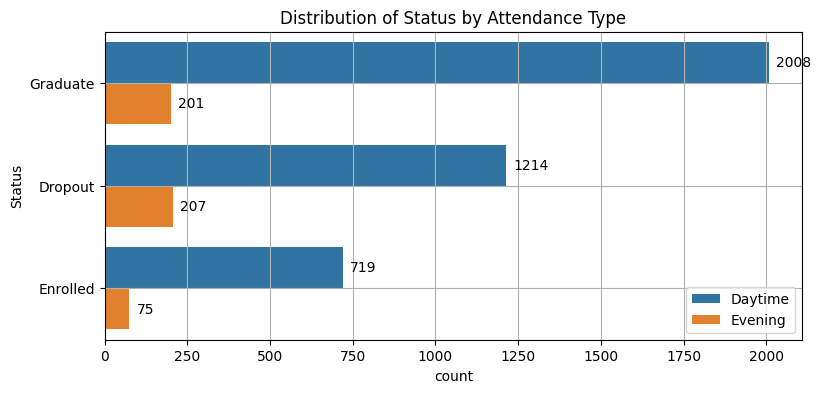

In [29]:
count_plot(cat_df, 'Status', 'Daytime_evening_attendance', 'Status by Attendance Type', (9, 4))

Daytime classes are the preferred choice for most students, consistently across the statuses of Graduates, Dropouts, and Enrolled.

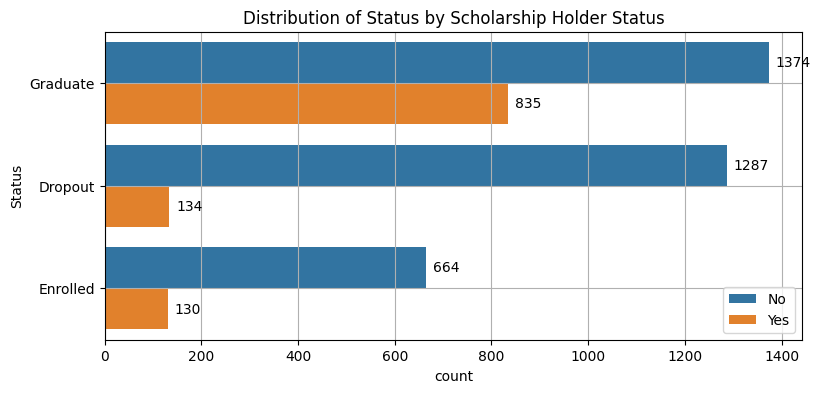

In [30]:
count_plot(cat_df, 'Status', 'Scholarship_holder', 'Status by Scholarship Holder Status', (9, 4))

Among students receiving scholarships, there are more Graduates than Dropouts. The number of scholarship recipients who dropped out is almost the same as those who are currently enrolled.

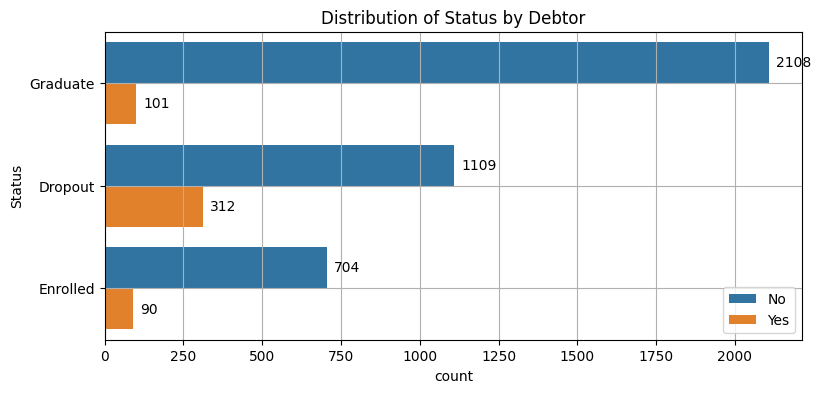

In [31]:
count_plot(cat_df, 'Status', 'Debtor', 'Status by Debtor', (9, 4))

Among students who are in debt, dropouts constitute the largest group, significantly more than those who have graduated or are still enrolled. This finding strongly suggests that financial factors are a major driver of student dropout and affect graduation rates.

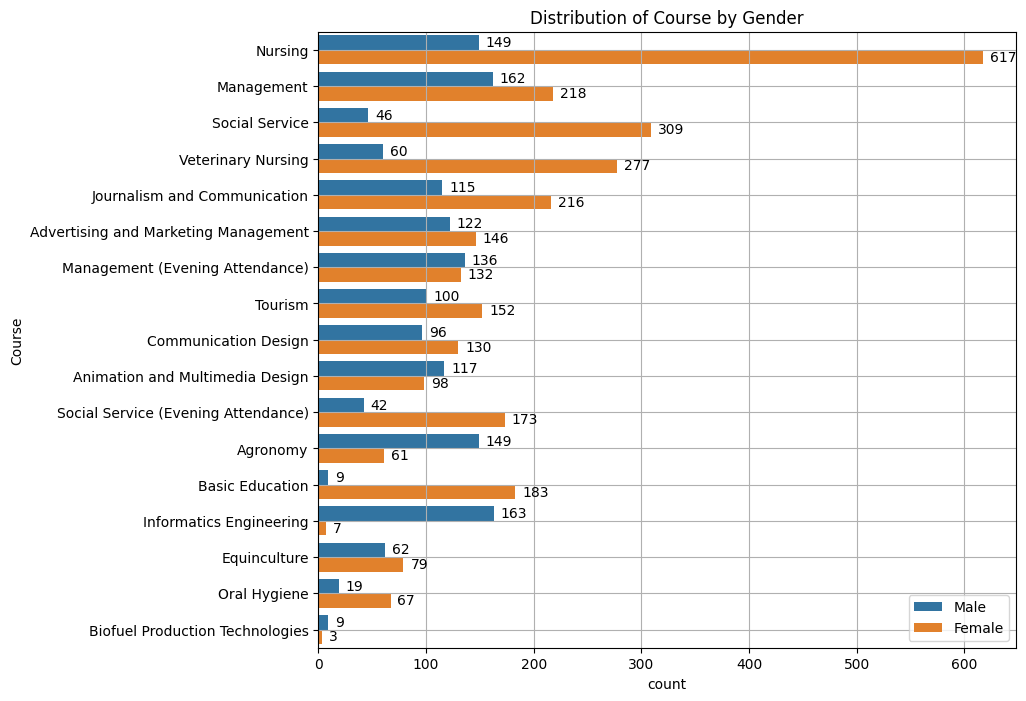

In [32]:
count_plot(cat_df, 'Course', 'Gender', 'Course by Gender', (9, 8))

Nursing is the course with the most data and has a female majority, while Biofuel Production Technologies has the least data and is male-dominated. Additionally, the largest number of male students are found in the Informatics Engineering and Management courses.

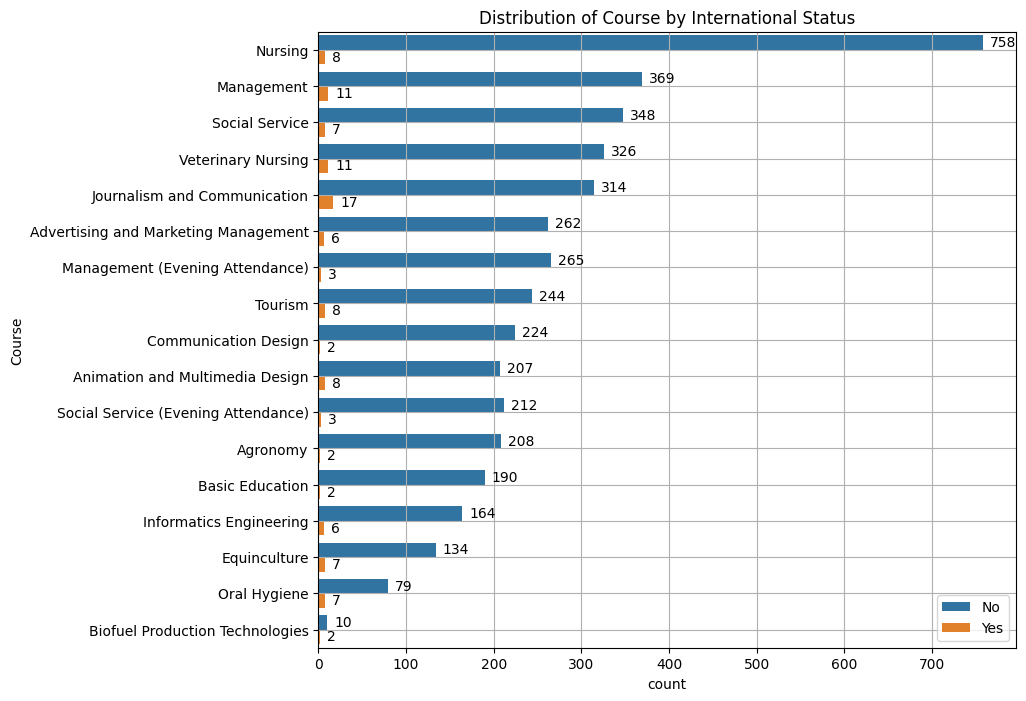

In [33]:
count_plot(cat_df, 'Course', 'International', 'Course by International Status', (9, 8))

The majority of students are local; international students, who are fewer in number, are more likely to pursue studies in Journalism and Communication.

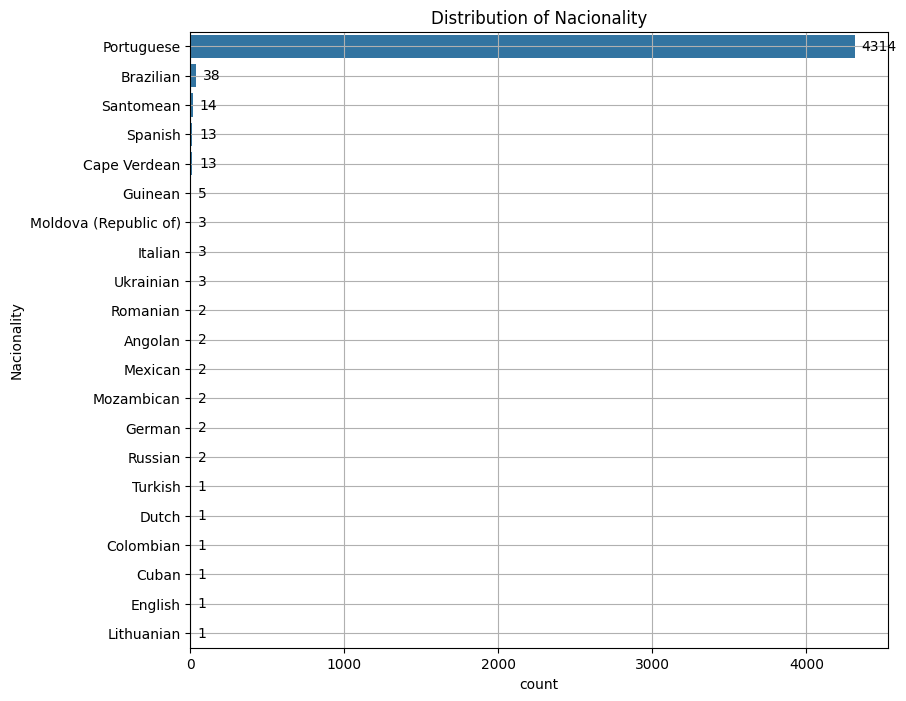

In [34]:
count_plot(cat_df, 'Nacionality', title='Nacionality', figsize=(9, 8))

Portuguese is the most frequent student nationality in the dataset, accounting for 97.51% of the records.

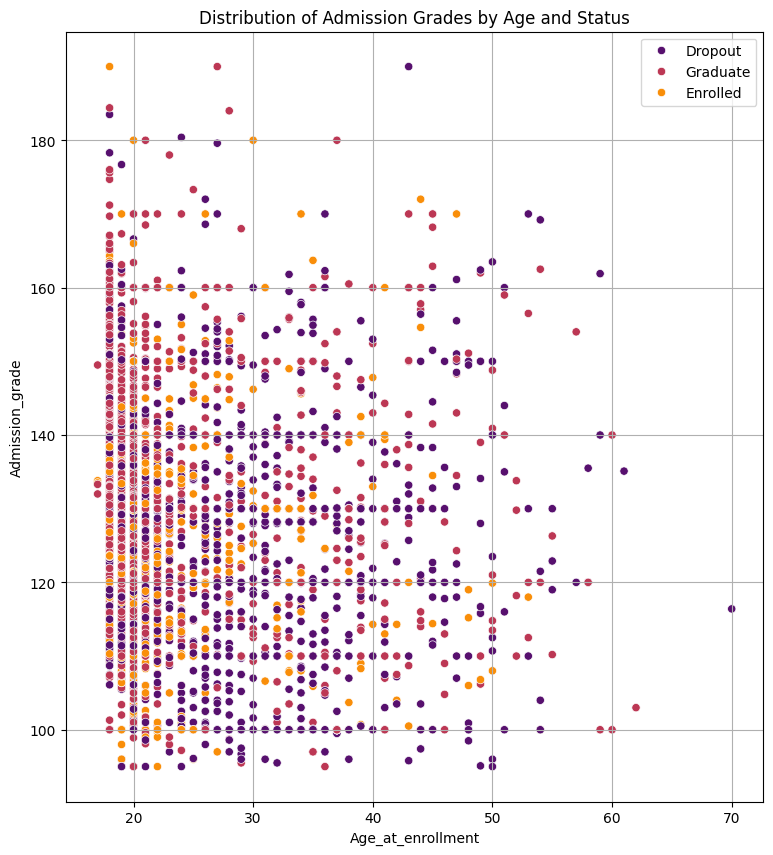

In [35]:
plt.figure(figsize=(9, 10))
sns.scatterplot(data=cat_df, x='Age_at_enrollment', y='Admission_grade',
                hue='Status', palette='inferno')
plt.title('Distribution of Admission Grades by Age and Status')
plt.legend(loc='upper right')
plt.grid()

The scatterplot illustrating Admission Grades by Age and Status suggests that, on average, most graduates are students aged 17-25 with admission grades typically ranging from 120 to 160. In contrast, older students, aged 30-50, tend to have dropout status and lower average admission grades between 100 and 140.

## Data Preparation / Preprocessing

In [36]:
df.head(10)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,2
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,2
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,0
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,2
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,0


Check status label values

In [37]:
dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

{'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}

Filter out all rows where the 'Status' column has a value of 1 (Enrolled), and then recode the 'Graduate' status from 2 to 1.

In [38]:
df = df[df['Status'] != 1]
df = df.reset_index(drop=True)

df.loc[:, 'Status'] = df['Status'].replace({2: 1})
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
3626,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
3627,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
3628,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


In [39]:
df['Status'].value_counts()

,count
Status,
1,2209
0,1421


The label (or target variable) in this dataset is the 'Status' feature, which identifies students as either Graduate or Dropout.

Feature Selection

Discard the data features whose absolute correlation is less than 0.1

In [40]:
df_selection = df.loc[:, df.corr()['Status'].abs().ge(0.1)]
df_selection

,Marital_status,Application_mode,Previous_qualification_grade,Admission_grade,Displaced,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
0,1,17,122.0,127.3,1,0,1,1,0,20,0,0,0.000000,0,0,0,0.000000,0,0
1,1,15,160.0,142.5,1,0,0,1,0,19,6,6,14.000000,6,6,6,13.666667,0,1
2,1,1,122.0,124.8,1,0,0,1,0,19,6,0,0.000000,6,0,0,0.000000,0,0
3,1,17,122.0,119.6,1,0,1,0,0,20,6,6,13.428571,6,10,5,12.400000,0,1
4,2,39,100.0,141.5,0,0,1,0,0,45,6,5,12.333333,6,6,6,13.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1,1,125.0,122.2,0,0,1,1,0,19,6,5,13.600000,6,8,5,12.666667,0,1
3626,1,1,120.0,119.0,1,1,0,0,0,18,6,6,12.000000,6,6,2,11.000000,0,0
3627,1,1,154.0,149.5,1,0,1,0,1,30,7,7,14.912500,8,9,1,13.500000,0,0
3628,1,1,180.0,153.8,1,0,1,0,1,20,5,5,13.800000,5,6,5,12.000000,0,1


In [41]:
df_selection.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Marital_status,3630.0,1.184298,0.613009,1.0,1.000000,1.000000,1.0,6.000000
Application_mode,3630.0,18.421763,17.358595,1.0,1.000000,17.000000,39.0,57.000000
Previous_qualification_grade,3630.0,132.920606,13.238373,95.0,125.000000,133.100000,140.0,190.000000
Admission_grade,3630.0,127.293939,14.611295,95.0,118.000000,126.500000,135.1,190.000000
Displaced,3630.0,0.549036,0.497658,0.0,0.000000,1.000000,1.0,1.000000
Debtor,3630.0,0.113774,0.317580,0.0,0.000000,0.000000,0.0,1.000000
Tuition_fees_up_to_date,3630.0,0.866116,0.340575,0.0,1.000000,1.000000,1.0,1.000000
Gender,3630.0,0.344077,0.475132,0.0,0.000000,0.000000,1.0,1.000000
Scholarship_holder,3630.0,0.266942,0.442423,0.0,0.000000,0.000000,1.0,1.000000
Age_at_enrollment,3630.0,23.461157,7.827994,17.0,19.000000,20.000000,25.0,70.000000


In [42]:
df_selection.to_csv('selection_student_data.csv', index=False)

Data Splitting

Split the dataset into the independent variable (X) and the dependent variable (y) as a label.

In [43]:
X = df_selection.drop(['Status'], axis=1)
y = df_selection['Status']

Data Resampling

Data resampling is a technique used to create new samples from an existing original dataset. Its primary uses revolve around understanding the variability of a statistic or model, evaluating model performance, and handling specific data challenges.

Example: Oversampling minority classes (e.g., SMOTE)

In [44]:
import collections
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=20241124)
X_smote, y_smote = smote.fit_resample(X, y)

y_counter = collections.Counter(y)
y_smote_counter = collections.Counter(y_smote)

comparison_df = pd.DataFrame({
    'None': y_counter,
    'SMOTE': y_smote_counter
})

comparison_df.loc['Total'] = [sum(y_counter.values()), sum(y_smote_counter.values())]
comparison_df

,None,SMOTE
0,1421,2209
1,2209,2209
Total,3630,4418


Train Test Split

Split the resampled dataset into 80% data training and 20% data testing.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X_smote, y_smote, test_size=0.2, random_state=82, stratify=y_smote)

print('X_train :', X_train.shape)
print('y_train :', y_train.shape)
print('X_test  :', X_test.shape)
print('y_test  :', y_test.shape)

X_train : (3534, 18)
y_train : (3534,)
X_test  : (884, 18)
y_test  : (884,)


Standardization

In [46]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# print(f'X_train:\n{X_train}\n')
# print(f'X_test:\n{X_test}')

Standardization

In [50]:
def scaling(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "scaler_{}.joblib".format(feature))

            X_test = np.asanyarray(df_test[feature])
            X_test = X_test.reshape(-1,1)
            df_test["{}".format(feature)] = scaler.transform(X_test)
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "scaler_{}.joblib".format(feature))
        return df

In [51]:
numerical_columns = [
    "Marital_status",
    "Application_mode",
    "Previous_qualification_grade",
    "Admission_grade",
    "Displaced",
    "Debtor",
    "Tuition_fees_up_to_date",
    "Gender",
    "Scholarship_holder",
    "Age_at_enrollment",
    "Curricular_units_1st_sem_enrolled",
    "Curricular_units_1st_sem_approved",
    "Curricular_units_1st_sem_grade",
    "Curricular_units_2nd_sem_enrolled",
    "Curricular_units_2nd_sem_evaluations",
    "Curricular_units_2nd_sem_approved",
    "Curricular_units_2nd_sem_grade",
    "Curricular_units_2nd_sem_without_evaluations"
]

In [52]:
new_train_df, new_test_df = scaling(numerical_columns, X_train, X_test)

## Modeling

In [53]:
# Define models
models = {
    'DT': DecisionTreeClassifier(class_weight='balanced'),
    'RF': RandomForestClassifier(class_weight='balanced'),
    'GB': GradientBoostingClassifier(),
    'LR': LogisticRegression(class_weight='balanced', max_iter=10000),
    'NB': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(class_weight='balanced', max_iter=10000)
}

# Define the metrics
metrics = {metric: [] for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']}

# Fit models and calculate metrics
for model_name, model in models.items():
    model.fit(new_train_df, y_train)
    pred = model.predict(new_test_df)

    metrics['Accuracy'].append(accuracy_score(y_test, pred))
    metrics['Precision'].append(precision_score(y_test, pred))
    metrics['Recall'].append(recall_score(y_test, pred))
    metrics['F1-Score'].append(f1_score(y_test, pred))

In [54]:
# Create a DataFrame from the collected metrics
model_metrics = pd.DataFrame(metrics, index=models.keys())
model_metrics

,Accuracy,Precision,Recall,F1-Score
DT,0.866516,0.855263,0.882353,0.868597
RF,0.910633,0.882105,0.947964,0.913850
GB,0.912896,0.889126,0.943439,0.915477
LR,0.898190,0.868201,0.938914,0.902174
NB,0.823529,0.775000,0.911765,0.837838
KNN,0.878959,0.839757,0.936652,0.885561
SVM,0.901584,0.862986,0.954751,0.906552


Based on the evaluation metrics, the Random Forest Classifier performed better than the other models, leading to its selection.

In [55]:
rf_classifier = RandomForestClassifier(class_weight='balanced').fit(X_train, y_train)
rf_classifier

RandomForestClassifier(class_weight='balanced')

In [56]:
y_train_rf = rf_classifier.predict(X_train)
y_test_rf = rf_classifier.predict(X_test)

## Evaluation

Evaluation Report Model

In [57]:
def generate_evaluation_report(y_train, y_predicted, title='Data'):
    print('Classification Report on ' + title)
    print(classification_report(y_train, y_predicted))

    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion_matrix(y_train, y_predicted), annot=True, fmt='d')
    plt.title('Confusion Matrix on ' + title)
    plt.ylabel('True Label Status', fontsize=10)
    plt.xlabel('Predicted Label Status', fontsize=10)
    plt.yticks(fontsize=8)
    plt.xticks(fontsize=8)
    plt.show()

Evaluation Report on Training Data

Classification Report on Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1767
           1       1.00      1.00      1.00      1767

    accuracy                           1.00      3534
   macro avg       1.00      1.00      1.00      3534
weighted avg       1.00      1.00      1.00      3534



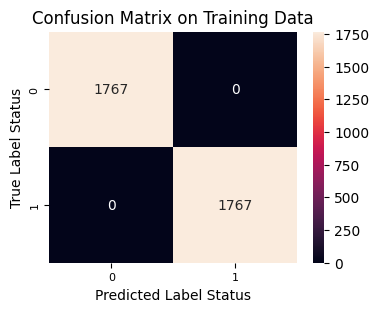

In [58]:
generate_evaluation_report(y_train, y_train_rf, title='Training Data')

Evaluation Report on Testing Data

Classification Report on Testing Data
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       442
           1       0.89      0.95      0.92       442

    accuracy                           0.92       884
   macro avg       0.92      0.92      0.92       884
weighted avg       0.92      0.92      0.92       884



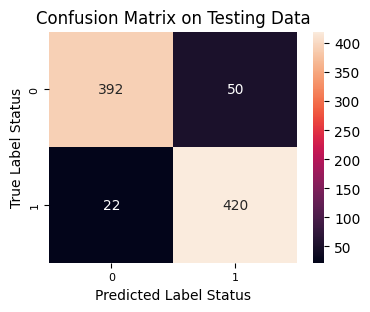

In [59]:
generate_evaluation_report(y_test, y_test_rf, title='Testing Data')

Hyperparameter Tuning

In [60]:
# Hyperparameter tuning on base model using Grid Search Cross Validation
param_grid = {
    'n_estimators': [100, 250, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 10, 20],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'oob_score': [False],
    'class_weight': ['balanced']
}

clf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=3)
clf

GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 250, 500],
                         'oob_score': [False]},
             verbose=3)

In [61]:
# Fit for the best model params estimators
best_model = clf.fit(X_train, y_train)
best_model.best_estimator_

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, max_features='log2', min_samples_split=3)

In [62]:
# Predict the training and testing data using the best model
y_train_best = best_model.predict(X_train)
y_test_best = best_model.predict(X_test)

Evaluation Report with best parameter on Training Data

Classification Report on Training Data Best Model
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1767
           1       0.99      1.00      1.00      1767

    accuracy                           1.00      3534
   macro avg       1.00      1.00      1.00      3534
weighted avg       1.00      1.00      1.00      3534



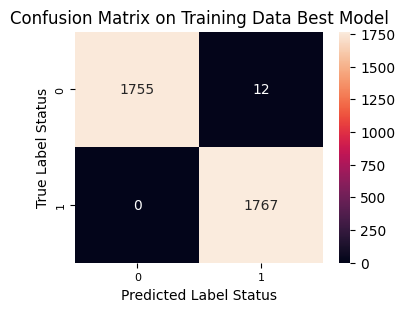

In [63]:
generate_evaluation_report(y_train, y_train_best, title='Training Data Best Model')

Evaluation Report with best parameter on Testing Data

Classification Report on Testing Data Best Model
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       442
           1       0.88      0.95      0.92       442

    accuracy                           0.91       884
   macro avg       0.92      0.91      0.91       884
weighted avg       0.92      0.91      0.91       884



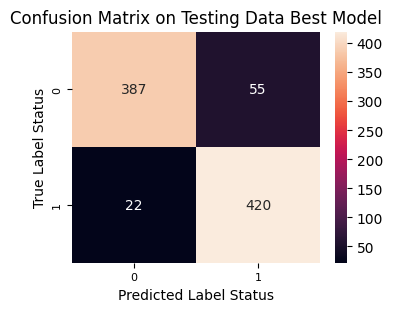

In [64]:
generate_evaluation_report(y_test, y_test_best, title='Testing Data Best Model')

In [65]:
joblib.dump(best_model, 'rdf_model.joblib')

['rdf_model.joblib']